In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape


(10000, 14)

In [4]:
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.drop(["RowNumber",'CustomerId',"Surname"],axis=1,inplace=True)

In [7]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='count'>

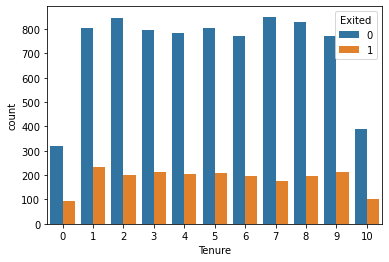

In [14]:
sns.countplot(x='Tenure',hue='Exited',data=df)

In [15]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
df.Gender.replace({"Male":0,"Female":1},inplace=True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df1=pd.get_dummies(data=df,columns=["Geography"])

In [27]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,0,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()

In [35]:
col_to_scale=["CreditScore","Balance","EstimatedSalary","Tenure"]

In [36]:
df1[col_to_scale]=scaler.fit_transform(df1[col_to_scale])

In [37]:
df1.head(4)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,42,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,41,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,42,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,39,0.1,0.000000,2,0,0,0.469120,0,1,0,0


In [43]:
df1.shape

(10000, 13)

In [39]:
x=df1.drop("Exited",axis=1)
y=df1["Exited"]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=78)

In [46]:
x_train.shape

(8000, 12)

In [53]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
    ])
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.8377 - accuracy: 0.4383
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.7977
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.7977
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.7977
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7977
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7977
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.7972
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7984
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.8012
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8060

In [54]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 912us/step - loss: 0.4257 - accuracy: 0.8150


[0.42573538422584534, 0.8149999976158142]

In [55]:
y_pre=model.predict(x_test)

In [57]:
y_pred=[]
for i in y_pre:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [58]:
y_test[:5]

4208    0
3619    0
5826    0
6538    1
8787    0
Name: Exited, dtype: int64

In [59]:
y_pred[:5]

[0, 0, 0, 0, 1]

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1581
           1       0.63      0.29      0.40       419

    accuracy                           0.81      2000
   macro avg       0.73      0.62      0.64      2000
weighted avg       0.79      0.81      0.79      2000



Text(33.0, 0.5, 'True')

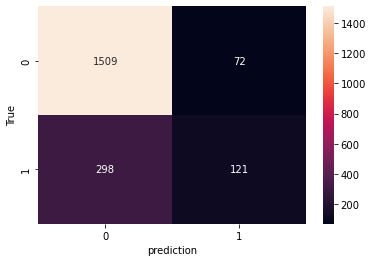

In [62]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("prediction")
plt.ylabel("True")

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
mod_pre=model_1.predict(x_test)

In [66]:
mod_pre[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [67]:
y_test[:5]

4208    0
3619    0
5826    0
6538    1
8787    0
Name: Exited, dtype: int64

Text(33.0, 0.5, 'True')

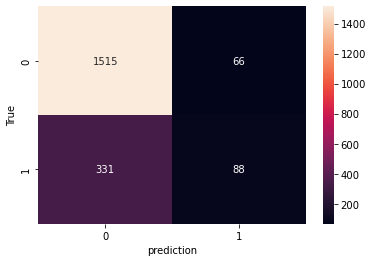

In [69]:
cm_1=tf.math.confusion_matrix(labels=y_test,predictions=mod_pre)
sns.heatmap(cm_1,annot=True,fmt='d')
plt.xlabel("prediction")
plt.ylabel("True")

In [70]:
print(classification_report(y_test,mod_pre))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1581
           1       0.57      0.21      0.31       419

    accuracy                           0.80      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.77      0.80      0.76      2000



In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
model_2=GaussianNB()
model_2.fit(x_train,y_train,)

GaussianNB()

In [74]:
mod_pre_1=model_2.predict(x_test)

In [75]:
print(classification_report(y_test,mod_pre_1))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1581
           1       0.53      0.31      0.39       419

    accuracy                           0.80      2000
   macro avg       0.68      0.62      0.64      2000
weighted avg       0.77      0.80      0.78      2000



In [76]:
from sklearn.neighbors import KNeighborsClassifier
model_3=KNeighborsClassifier()
model_3.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
mod_pre_2=model_2.predict(x_test)
print(classification_report(y_test,mod_pre_2))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1581
           1       0.53      0.31      0.39       419

    accuracy                           0.80      2000
   macro avg       0.68      0.62      0.64      2000
weighted avg       0.77      0.80      0.78      2000

